In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install lime
!pip install shap

     |████████████████████████████████| 275 kB 33.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=764b3861716c5fdbcdbde292609ac7bc8fa6de94928a0c71f9647ea0223e9f6d
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 356 kB 33.4 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491639 sha256=fd87694c9c592e39c0d221b507707c61e42f0c64575374a08b51c387165f0887
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
#Import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:

data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/Paper1/Telco_customer_churn.xlsx')
print(data.shape)
data.head()

(7043, 33)


,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
#Check for misssing values
data.isnull().sum()# No missing values are present in the dataset

CustomerID             0
Count                  0
Country                0
State                  0
City                   0
ZipCode                0
LatLong                0
Latitude               0
Longitude              0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
TenureMonths           0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
ChurnLabel             0
ChurnValue             0
ChurnScore             0
CLTV                   0
ChurnReason         5174
dtype: int64

In [ ]:
#Five number summary
data.describe()

,Count,ZipCode,Latitude,Longitude,TenureMonths,MonthlyCharges,ChurnValue,ChurnScore,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
#The info() function is used to print a summary of a DataFrame 
#See the data types and count of values in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [ ]:
data['ChurnValue'].value_counts()

0    5174
1    1869
Name: ChurnValue, dtype: int64

In [ ]:
## Bar Plot
def bar_plot(data, plot_title: str, x_axis: str, y_axis: str):
    colors = ["#0080ff",] * len(data)
    colors[0] = "#ff8000"
    trace = go.Bar(y=data.values, x=data.index, text=data.values, 
                    marker_color=colors)
    layout = go.Layout(autosize=False, height=500,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"},  
                    xaxis={"title" : x_axis},
                    yaxis={"title" : y_axis},)
    fig = go.Figure(data=trace, layout=layout)
    fig.update_layout(template="simple_white")
    fig.update_traces(textposition="outside",
                    textfont_size=9,
                    marker=dict(line=dict(color="#000000", width=0.2)))                
    fig.update_yaxes(automargin=True)
    iplot(fig)

 


In [ ]:
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns

In [ ]:
df_aux = data.query('ChurnLabel == "Yes"')
df_aux = df_aux["Contract"].value_counts()
bar_plot(df_aux, "<b>Contract Types of  Churned Customers</b>", "<i>Contracts</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query('ChurnLabel == "Yes"')
df_aux = df_aux["Gender"].value_counts()
bar_plot(df_aux, "<b>Gender distribution of Churned Customers</b>", "<i>Gender</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query('ChurnLabel == "Yes"')
df_aux = df_aux["SeniorCitizen"].value_counts()
bar_plot(df_aux, "<b> Is the Churned Customers a Senior Citizen or not</b>", "<i>Senior Citizen</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query(('Contract == Month-to-month') and ('ChurnLabel == "Yes"'))
df_aux = df_aux["PaymentMethod"].value_counts()
bar_plot(df_aux, "<b>Payment Method of Month-to-month contract Churned Customers</b>", "<i>Payment Method</i>", "<i>Count</i>")

In [ ]:
df_aux = data.query('ChurnLabel == "Yes"')
df_aux = df_aux["ChurnReason"].value_counts()
bar_plot(df_aux, "<b>Churn Reasons </b>", "<i>Churn Reasons</i>", "<i>Count</i>")

In [ ]:
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

In [ ]:
pie_plot(data["ChurnLabel"].value_counts(), plot_title="<b>Customer Churn Distribution<b>")

In [ ]:
df=data[['Latitude', 'Longitude','City','Gender','SeniorCitizen','Partner','Dependents','TenureMonths','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','ChurnValue']]

In [ ]:
#df=data[['City','Gender','SeniorCitizen','Partner','Dependents','TenureMonths','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','ChurnScore','CLTV','ChurnValue']]

In [ ]:
df

,Latitude,Longitude,City,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnValue
0,33.964131,-118.272783,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,34.059281,-118.307420,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,34.048013,-118.293953,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,34.062125,-118.315709,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,34.039224,-118.266293,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,-116.539416,Landers,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0
7039,34.667815,-117.536183,Adelanto,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7040,34.559882,-115.637164,Amboy,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7041,34.167800,-116.864330,Angelus Oaks,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          7043 non-null   float64
 1   Longitude         7043 non-null   float64
 2   City              7043 non-null   object 
 3   Gender            7043 non-null   object 
 4   SeniorCitizen     7043 non-null   object 
 5   Partner           7043 non-null   object 
 6   Dependents        7043 non-null   object 
 7   TenureMonths      7043 non-null   int64  
 8   PhoneService      7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = 'coerce')



In [ ]:
#labeleconder the categorical columns
print(df["TechSupport"].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


In [ ]:

#labeleconder the categorical columns
print(df["Dependents"].value_counts())


No     5416
Yes    1627
Name: Dependents, dtype: int64


In [ ]:
print(df["TenureMonths"].value_counts())


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: TenureMonths, Length: 73, dtype: int64


In [ ]:
print(df["OnlineSecurity"].value_counts())



No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


In [ ]:
print(df["Contract"].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, plot_confusion_matrix,plot_roc_curve
labelencoder=LabelEncoder()

#labeleconder the categorical columns
df.iloc[:,2] =labelencoder.fit_transform(df.iloc[0:,2].values)
df.iloc[:,3] =labelencoder.fit_transform(df.iloc[0:,3].values)
df.iloc[:,4] =labelencoder.fit_transform(df.iloc[0:,4].values)
df.iloc[:,5] =labelencoder.fit_transform(df.iloc[0:,5].values)
df.iloc[:,6] =labelencoder.fit_transform(df.iloc[0:,6].values)
df.iloc[:,8] =labelencoder.fit_transform(df.iloc[0:,8].values)
df.iloc[:,9] =labelencoder.fit_transform(df.iloc[0:,9].values)
df.iloc[:,10] =labelencoder.fit_transform(df.iloc[0:,10].values)
df.iloc[:,11] =labelencoder.fit_transform(df.iloc[0:,11].values)
df.iloc[:,12] =labelencoder.fit_transform(df.iloc[0:,12].values)
df.iloc[:,13] =labelencoder.fit_transform(df.iloc[0:,13].values)
df.iloc[:,14] =labelencoder.fit_transform(df.iloc[0:,14].values)
df.iloc[:,15] =labelencoder.fit_transform(df.iloc[0:,15].values)
df.iloc[:,16] =labelencoder.fit_transform(df.iloc[0:,16].values)
df.iloc[:,17] =labelencoder.fit_transform(df.iloc[0:,17].values)
df.iloc[:,18] =labelencoder.fit_transform(df.iloc[0:,18].values)
df.iloc[:,19] =labelencoder.fit_transform(df.iloc[0:,19].values)

In [ ]:
#labeleconder the categorical columns
print(df["TechSupport"].value_counts())

0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64


In [ ]:
#labeleconder the categorical columns
print(df["Dependents"].value_counts())

0    5416
1    1627
Name: Dependents, dtype: int64


In [ ]:
print(df["OnlineSecurity"].value_counts())

0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64


In [ ]:
print(df["Contract"].value_counts())

0    3875
2    1695
1    1473
Name: Contract, dtype: int64


In [ ]:
df


,Latitude,Longitude,City,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnValue
0,33.964131,-118.272783,562,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
1,34.059281,-118.307420,562,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
2,34.048013,-118.293953,562,0,0,0,1,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
3,34.062125,-118.315709,562,0,0,1,1,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
4,34.039224,-118.266293,562,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,-116.539416,521,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
7039,34.667815,-117.536183,2,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7040,34.559882,-115.637164,22,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7041,34.167800,-116.864330,26,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0


In [ ]:

df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          7032 non-null   float64
 1   Longitude         7032 non-null   float64
 2   City              7032 non-null   int64  
 3   Gender            7032 non-null   int64  
 4   SeniorCitizen     7032 non-null   int64  
 5   Partner           7032 non-null   int64  
 6   Dependents        7032 non-null   int64  
 7   TenureMonths      7032 non-null   int64  
 8   PhoneService      7032 non-null   int64  
 9   MultipleLines     7032 non-null   int64  
 10  InternetService   7032 non-null   int64  
 11  OnlineSecurity    7032 non-null   int64  
 12  OnlineBackup      7032 non-null   int64  
 13  DeviceProtection  7032 non-null   int64  
 14  TechSupport       7032 non-null   int64  
 15  StreamingTV       7032 non-null   int64  
 16  StreamingMovies   7032 non-null   int64  


In [ ]:
fig = px.density_mapbox(data_frame=df, lat='Latitude', lon='Longitude', radius=10,
                        center=dict(lat=38, lon=-110), zoom=2.5,animation_frame='ChurnValue',
                        mapbox_style="stamen-terrain")
fig.show()

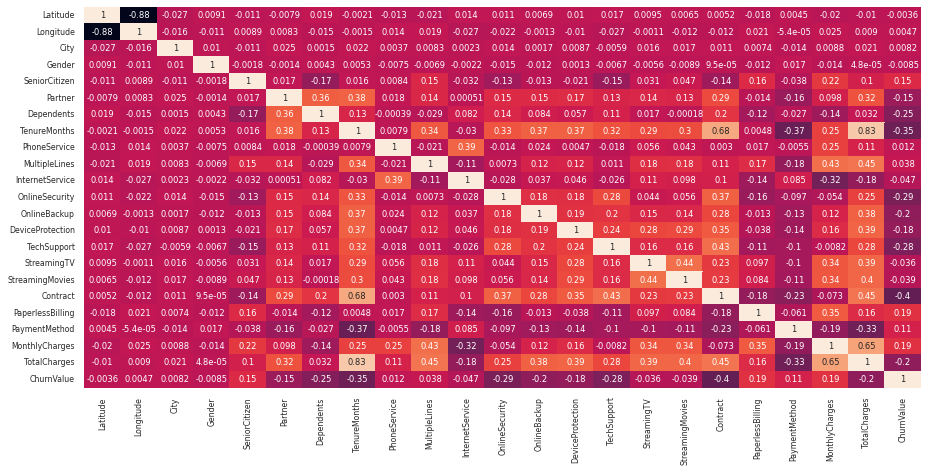

In [ ]:
# Heatmap Correlation - correlation analysis was performed to determine the relationship between the outcome and other variables.
#The relationship lies between -1 and +1, with negative being a weak relationship and positive a being strong relationship
plt.figure(figsize=(15,7))
sns.set(font_scale=0.7)
sns.heatmap(df.corr(),annot=True,cbar=False );

In [ ]:
# Class count
count_class_0, count_class_1 = df.ChurnValue.value_counts()

# Divide by class
df_class_0 = df[df['ChurnValue'] == 0]
df_class_1 = df[df['ChurnValue'] == 1]

Random under-sampling:
1    1869
0    1869
Name: ChurnValue, dtype: int64


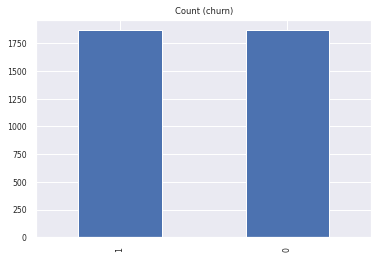

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_undersampling = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_undersampling.ChurnValue.value_counts())

df_test_undersampling.ChurnValue.value_counts().plot(kind='bar', title='Count (churn)');

In [ ]:
#Create independent and Dependent Features
LABELS = ["0", "1"]
columns = df_test_undersampling.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["ChurnValue"]]
# Store the variable we are predicting 
target = "ChurnValue"
# Define a random state 
state = np.random.RandomState(42)
X = df_test_undersampling[columns]
Y = df_test_undersampling[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(3738, 22)
(3738,)


In [ ]:
#b. 80/20 split into training and testing sets
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
seed=7
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=seed) #.ravel will convert that array shape to (n, )
print("X training size\t| X validation size\t| y training size\t| Y validation size")
print(str(X_train.shape) + "\t  " + str(X_test.shape) + "\t\t  " + str(y_train.shape) + "\t\t   " + str(y_test.shape))

X training size	| X validation size	| y training size	| Y validation size
(2990, 22)	  (748, 22)		  (2990,)		   (748,)


In [ ]:
#feature scaling
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV


In [ ]:
from sklearn.tree import DecisionTreeClassifier



from random import randint
classifier = DecisionTreeClassifier()
        # Create the parameter grid based on the results of random search 
param_grid =  {
    'max_depth': [2, 3, 5, 10, 20],
    'max_features': ['auto', 'log2', None],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}   

In [2]:

opt_params =RandomizedSearchCV(estimator=classifier,
                           param_distributions=param_grid,
                           scoring='roc_auc',
                           random_state=seed,
                           n_iter=20,
                           cv=5,n_jobs=3,verbose=1,  return_train_score=True)   

In [1]:

opt_params.fit(X_train, y_train)
params = opt_params.best_params_
print(params)

In [ ]:

classifier= DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier()
# classifier = classifier.fit(X_train,y_train)

In [ ]:
def model_auc(model):
    train_auc = roc_auc_score(y_train, classifier.predict_proba(X_train)[:, 1])
    val_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
    print(f'Train AUC: {train_auc}, Val Auc: {val_auc}')

In [ ]:
# model performance
model_auc(classifier)
# predicting the likelihood for the validation set
y_pred = classifier.predict_proba(X_test)[:, 1]

Train AUC: 0.8521328456212177, Val Auc: 0.8256209935897436


AUC score of the model is 0.8256209935897436


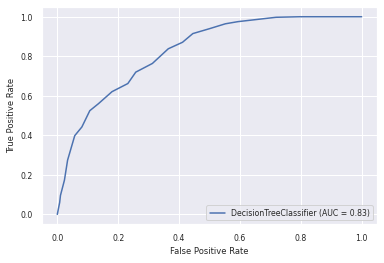

In [ ]:
# checking the roc_auc_curve
print('AUC score of the model is {}'.format(roc_auc_score(y_test, y_pred)))
# the visualization of roc_auc score
plot_roc_curve(classifier, X_test, y_test)


In [ ]:
print("------------------------------ Testing --------------------------------")
# Test using optimised models
#1.
predsDT = classifier.predict(X_test)
print(classification_report(y_test, predsDT,target_names=["Churn No", "Churn Yes"]))


------------------------------ Testing --------------------------------
              precision    recall  f1-score   support

    Churn No       0.74      0.74      0.74       384
   Churn Yes       0.73      0.72      0.72       364

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748



In [ ]:
cmDT = confusion_matrix(y_test, predsDT)
print(cmDT)

[[285  99]
 [102 262]]


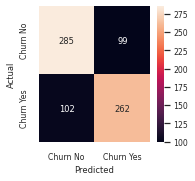

In [ ]:
import seaborn as sns
plt.figure(figsize=(2.5,2.5))
SVM=sns.heatmap(cmDT, annot=True, fmt = '.0f',xticklabels=["Churn No", "Churn Yes"], yticklabels=["Churn No", "Churn Yes"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
df=data[['Latitude', 'Longitude','City','Gender','SeniorCitizen','Partner','Dependents','TenureMonths','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','ChurnValue']]
X_featurenames = X.columns

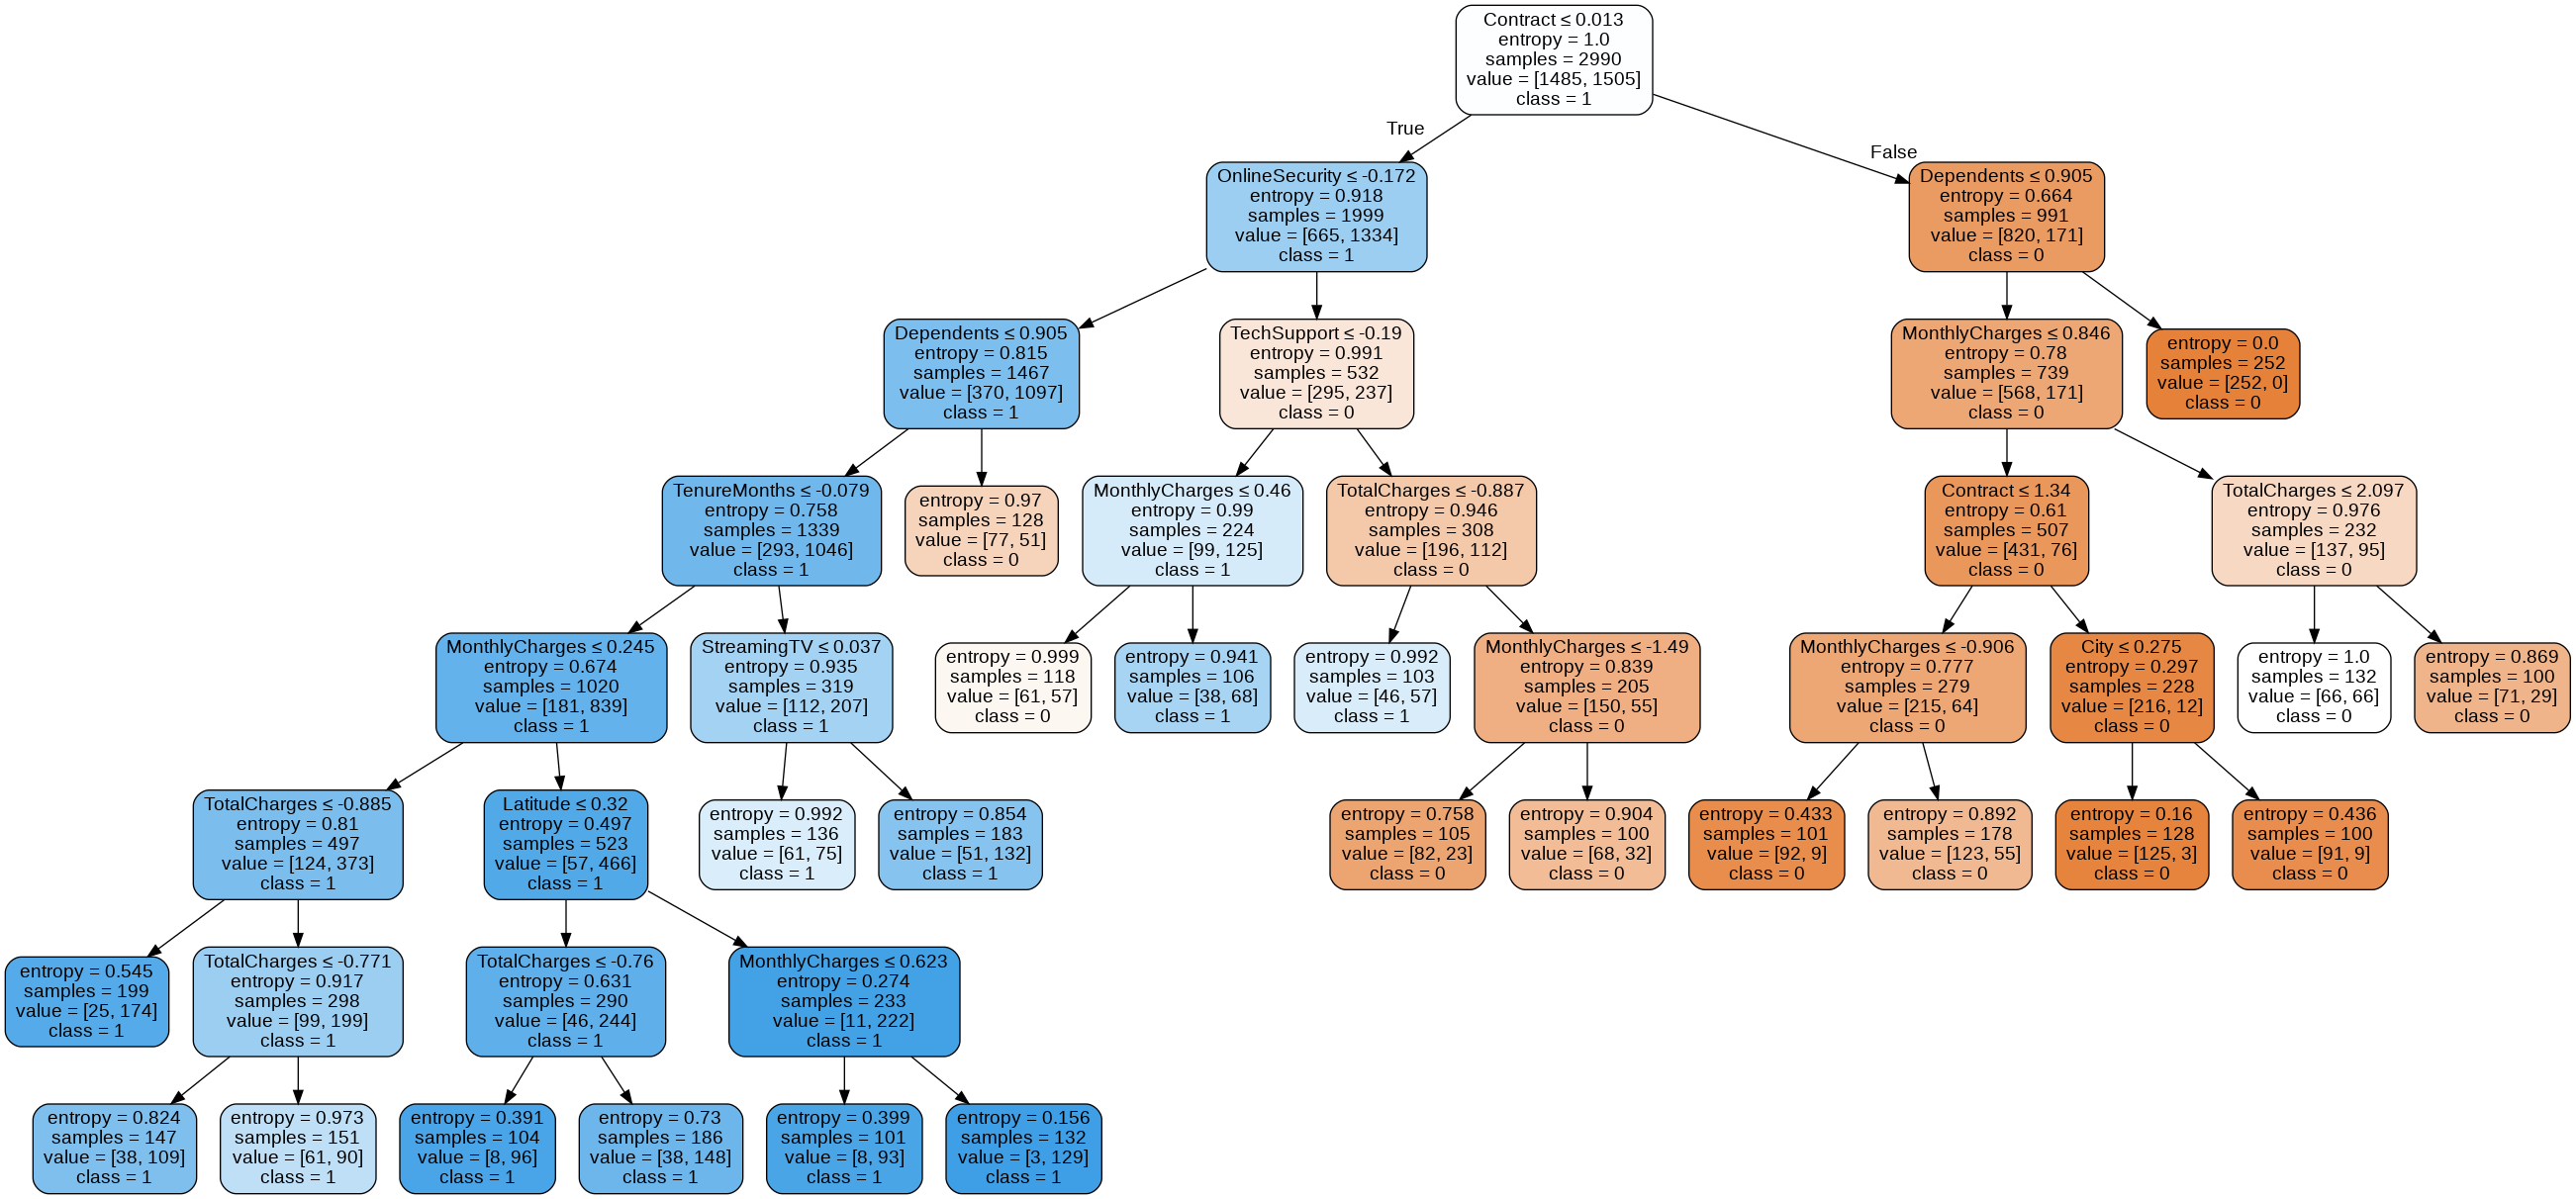

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_featurenames,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


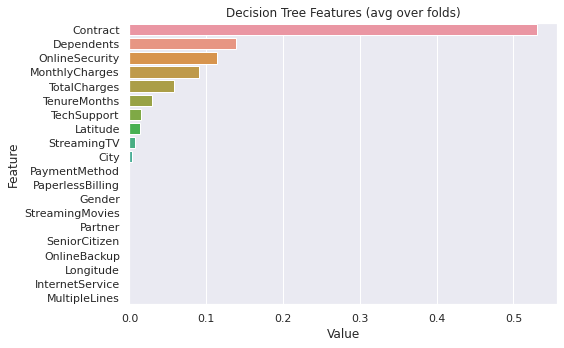

In [ ]:
feature_imp= pd.DataFrame({'Value':classifier.feature_importances_,'Feature':X.columns})
plt.figure(figsize=(8, 5))
sns.set(font_scale = 1)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:20])
plt.title('Decision Tree Features (avg over folds)')
plt.tight_layout()
plt.savefig('DT_importances-01.png')
plt.show()